In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
data = pd.read_excel("Favorite Sports Team Questionnaire.xlsx")
data.head(3)

,ID,Time to complete,Age group,Gender,Current occupation,Highest level of education completed,Country,favourite sport,favourite team,Have been a fan for,...,Purchased merchandise,Recommends the team others,attended a game or event hosted by fav team,Follows other teams,If Yes which team ?,Feeling when losing,Motivation to support the team,perception change to the game over the years,Certainty that the team receives fair coverage from the media,Previously switched teams
0,1,00:02:07,18-24,Male,Student,Less than high school,Egypt,Football,Al-Ahly,6-10 years,...,No,Somewhat likely,No,No,NaN,Somewhat disappointed,Loyalty to team/city,Improved,No,No
1,2,00:03:57,18-24,Male,Student,High school diploma/GED,Egypt,Football,Barcelona,6-10 years,...,Yes,Very likely,No,Yes,Real Madrid,Somewhat disappointed,Loyalty to team/city,Improved,Yes,No
2,3,00:04:04,18-24,Male,Employed,Bachelor's degree,Egypt,Football,Al ahly,More than 10 years,...,Yes,Very likely,Yes,Yes,Man City,Very disappointed,Loyalty to team/city,Stayed the same,Yes,No


In [3]:
data["Time to complete (decimal)"] = data["Time to complete"].apply(
    lambda x: x.hour + x.minute / 60 + x.second / 3600
)
time = pd.DataFrame(data["Time to complete (decimal)"].describe())
time

,Time to complete (decimal)
count,100.000000
mean,0.094044
std,0.070931
min,0.014722
25%,0.053472
50%,0.079722
75%,0.102153
max,0.428611


In [4]:
time1 = pd.DataFrame(data["Time to complete (decimal)"].describe())
time2 = time1.iloc[1:].apply(lambda x: pd.to_datetime(x, unit="h").dt.time)
merged_df = pd.concat([time1, time2], axis=1)
merged_df = merged_df.rename(columns={merged_df.columns[1]: "Time to complete"})
merged_df

,Time to complete,Time to complete
count,100.000000,NaN
mean,0.094044,00:05:38.559999
std,0.070931,00:04:15.352848
min,0.014722,00:00:53
25%,0.053472,00:03:12.500000
50%,0.079722,00:04:47
75%,0.102153,00:06:07.750000
max,0.428611,00:25:43


In [5]:
age_count = data["Age group"].value_counts()
age_freq_dist = pd.DataFrame({"Age": age_count.index, "Count": age_count.values})
age_freq_dist

,Age,Count
0,18-24,90
1,25-34,5
2,45-54,2
3,Under 18,2
4,35-44,1


In [6]:
total_freq = age_freq_dist["Count"].sum()
midpoints = {}
for i in range(len(age_freq_dist)):
    group = age_freq_dist.iloc[i]["Age"]
    freq = age_freq_dist.iloc[i]["Count"]
    if group == "Under 18":
        midpoint = 8.5
    else:
        lower, upper = map(int, group.split("-"))
        midpoint = (lower + upper) / 2
    midpoints[group] = midpoint

weighted_sum = 0
for group in midpoints:
    weighted_sum += (
        midpoints[group]
        * age_freq_dist.loc[age_freq_dist["Age"] == group, "Count"].iloc[0]
    )

mean_age = weighted_sum / total_freq

print(f"Mean age: {mean_age:.2f}")

Mean age: 21.93


In [7]:
gender_freq_dist = pd.DataFrame(data["Gender"].value_counts())
gender_freq_dist

,count
Gender,
Male,69
Female,31


In [8]:
occupation_freq_dist = pd.DataFrame(data["Current occupation"].value_counts())
occupation_freq_dist

,count
Current occupation,
Student,88
Employed,9
Unemployed,2
Retired,1


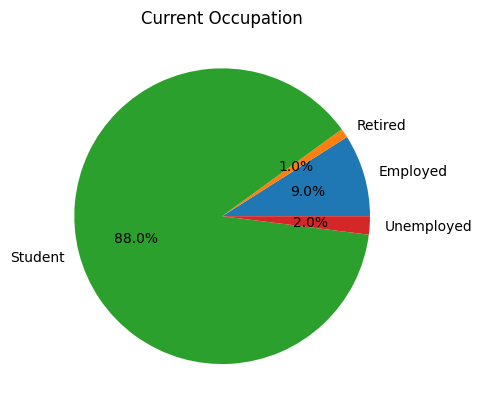

In [9]:
occ_count = data.groupby("Current occupation").size().reset_index(name="Count")
plt.pie(occ_count["Count"], labels=occ_count["Current occupation"], autopct="%1.1f%%")
plt.title("Current Occupation")
plt.show()

In [10]:
education_freq_dist = pd.DataFrame(
    data["Highest level of education completed"].value_counts()
)
education_freq_dist

,count
Highest level of education completed,
High school diploma/GED,62
Bachelor's degree,30
Less than high school,6
Professional degree,2


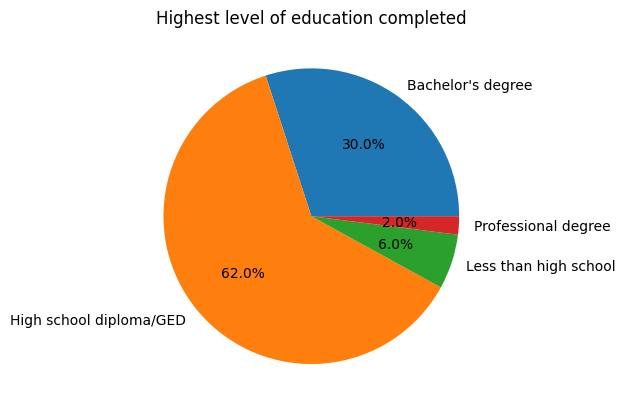

In [11]:
edu_count = (
    data.groupby("Highest level of education completed")
    .size()
    .reset_index(name="Count")
)
plt.pie(
    edu_count["Count"],
    labels=edu_count["Highest level of education completed"],
    autopct="%1.1f%%",
)
plt.title("Highest level of education completed")
plt.show()

In [12]:
Country_freq_dist = pd.DataFrame(data["Country"].value_counts())
Country_freq_dist

,count
Country,
Egypt,100


In [13]:
favSport_freq_dist = pd.DataFrame(data["favourite sport"].value_counts())
favSport_freq_dist

,count
favourite sport,
Football,91
Handball,4
Tennis,2
Rocket league,1
Basketball,1
Skateboarding,1


In [14]:
favTeam_freq_dist = pd.DataFrame(data["favourite team"].value_counts())
favTeam_freq_dist

,count
favourite team,
Al ahly,10
Real Madrid,8
Real Madrid,7
Al Ahly,6
Alahly,5
Barcelona,5
Liverpool,4
Zamalek,4
Ahly,3


In [15]:
data["favourite team (modify)"] = data["favourite team"].copy()
team_mapping = {
    "Al-Ahly": "Al Ahly",
    "Barcelona": "Barcelona",
    "Al ahly": "Al Ahly",
    "Al-ahly": "Al Ahly",
    "zamalek": "Zamalek",
    "Team Z": "Team Z",
    "RealMadrid": "Real Madrid",
    "RealMadrid": "Real Madrid",
    "Falcon": "Falcon",
    "El ahly": "Al Ahly",
    "Zamalek": "Zamalek",
    "Al-Ahly FC": "Al Ahly",
    "Ahly": "Al Ahly",
    "Manchester City": "Manchester City",
    "Zamalik": "Zamalek",
    "AlAhly eg6": "Al Ahly",
    "Al-Ahly FC": "Al Ahly",
    "Ahly": "Al Ahly",
    "Manchester City ": "Manchester City",
    "Al ahly": "Al Ahly",
    "Real Madrid": "Real Madrid",
    "Zamalik": "Zamalek",
    "Chelsea ": "Chelsea",
    "Real Madrid ": "Real Madrid",
    "El Ahly": "Al Ahly",
    "Al ahly": "Al Ahly",
    "Real Madrid ": "Real Madrid",
    "FC Barcelona": "Barcelona",
    "Barcelona": "Barcelona",
    "Liverpool ": "Liverpool",
    "Liverpool": "Liverpool",
    "a lahly": "Al Ahly",
    "Roger Federer": "Roger Federer",
    "Al ahly": "Al Ahly",
    "Man city ": "Manchester City",
    "liverpool": "Liverpool",
    "Al ahly": "Al Ahly",
    "RealMadrid ": "Real Madrid",
    "Real Madrid ": "Real Madrid",
    "Real Madrid": "Real Madrid",
    "Al ahly": "Al Ahly",
    "Al-Ahly": "Al Ahly",
    "Real Madrid ": "Real Madrid",
    "Barcelona": "Barcelona",
    "Zamalek": "Zamalek",
    "Zamalek": "Zamalek",
    "Elalhly": "Al Ahly",
    "Ahly": "Al Ahly",
    "Barcelona": "Barcelona",
    "Ahly": "Al Ahly",
    "Liverpool ": "Liverpool",
    "Al Ahly": "Al Ahly",
    "برشلونة  ": "Barcelona",
    "Liverpool ": "Liverpool",
    "Alahly": "Al Ahly",
    "Zamalek ": "Zamalek",
    "liverpool ": "Liverpool",
    "Al-Ahly": "Al Ahly",
    "Alahly": "Al Ahly",
    "Barcelona": "Barcelona",
    "Real Madrid ": "Real Madrid",
    "El ahly": "Al Ahly",
    "Al Ahly": "Al Ahly",
    "El-Ahly": "Al Ahly",
    "Al ahly": "Al Ahly",
    "Al Ahly ": "Al Ahly",
    "Liverpool ": "Liverpool",
    "barcha": "Barcelona",
    "Al Ahly": "Al Ahly",
    "Al Ahly SC": "Al Ahly",
    "Al-ahly fc": "Al Ahly",
    "Al Ahly": "Al Ahly",
    "Real Madrid ": "Real Madrid",
    "Liverpool": "Liverpool",
    "Al ahly": "Al Ahly",
    "Barcelona ": "Barcelona",
    "Red star": "Red Star",
    "Al ahly": "Al Ahly",
    "AL Ahly ": "Al Ahly",
    "Alahly": "Al Ahly",
    "Liverpool": "Liverpool",
    "Real Madrid": "Real Madrid",
    "Real madriad ": "Real Madrid",
    "Real Madrid ": "Real Madrid",
    "Juventus ": "Juventus",
    "AC Milan ": "AC Milan",
    "Al Ahly": "Al Ahly",
    "Manchester city": "Manchester City",
    "الأهلي المصري ": "Al Ahly",
    "الأهلي ": "Al Ahly",
    "Alahly": "Al Ahly",
    "Real Madrid": "Real Madrid",
    "El-Ahly": "Al Ahly",
    "Real Madrid": "Real Madrid",
    "Real Madrid": "Real Madrid",
    "Barcelona ": "Barcelona",
    "Al ahly": "Al Ahly",
    "Zamalek": "Zamalek",
    "Al Ahly": "Al Ahly",
    "Manchester United": "Manchester United",
    "Al Athad": "Al Ittihad Alexandria Club",
    "Nancy My BF": "Nancy My BF",
    "Al Zamalk": "Zamalek",
    "Alahly": "Al Ahly",
}
data["favourite team (modify)"] = data["favourite team (modify)"].map(team_mapping)
favTeam = pd.DataFrame(data["favourite team (modify)"].value_counts())
favTeam

,count
favourite team (modify),
Al Ahly,43
Real Madrid,17
Barcelona,10
Liverpool,9
Zamalek,8
Manchester City,3
Team Z,1
Falcon,1
Chelsea,1


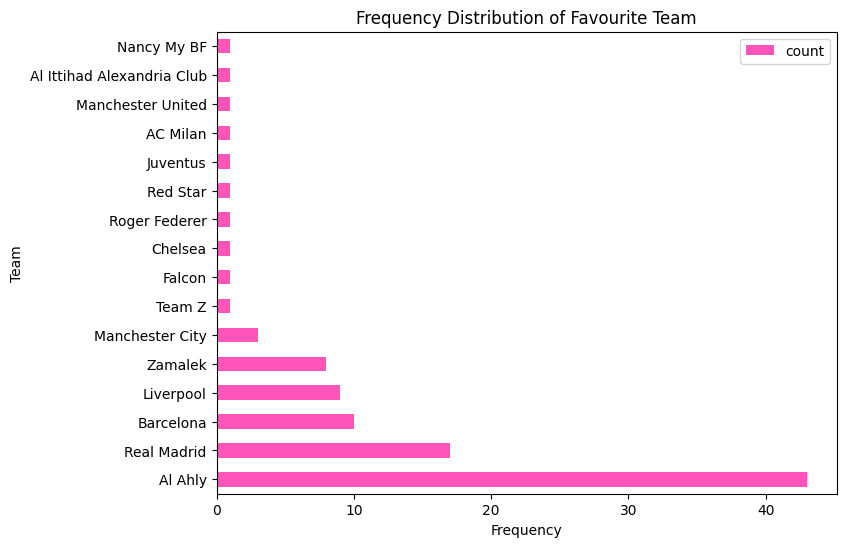

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
favTeam.plot(kind="barh", ax=ax, color="#FF55BB")
ax.set_title("Frequency Distribution of Favourite Team")
ax.set_xlabel("Frequency")
ax.set_ylabel("Team")
plt.show()

In [17]:
fan_freq_dist = pd.DataFrame(data["Have been a fan for"].value_counts())
fan_freq_dist

,count
Have been a fan for,
6-10 years,30
More than 10 years,28
3-5 years,22
Less than a year,13
1-2 years,7


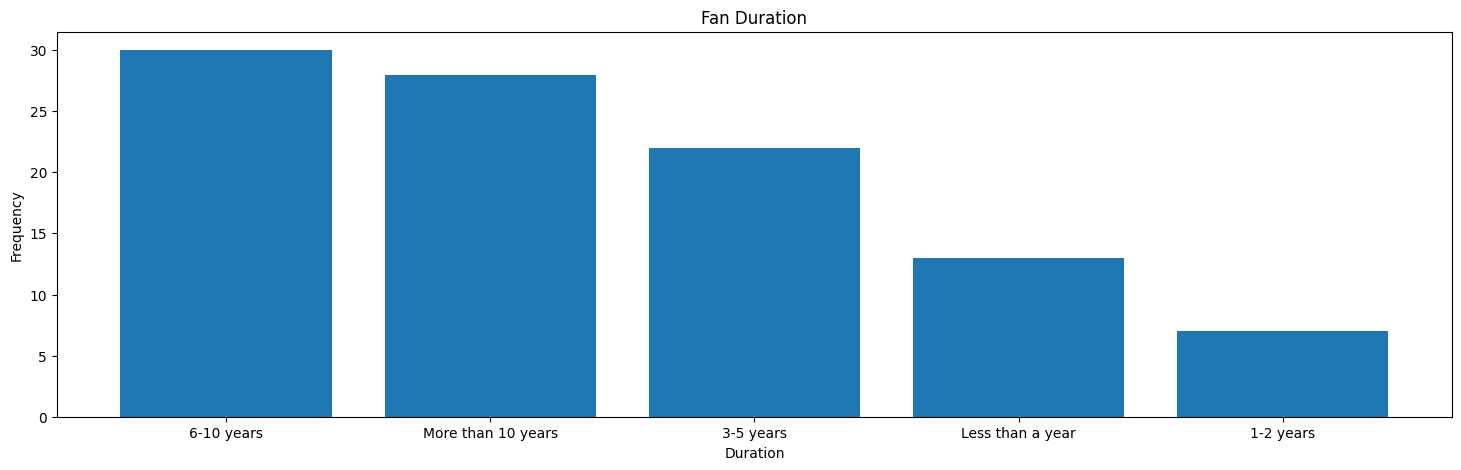

In [18]:
fan_duration_counts = data["Have been a fan for"].value_counts()
f, ax = plt.subplots(figsize=(18, 5))
plt.bar(fan_duration_counts.index, fan_duration_counts.values)
plt.title("Fan Duration")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

In [19]:
sup_freq_dist = pd.DataFrame(data["Main reason to support the team"].value_counts())
new_sup_frq = sup_freq_dist.drop(sup_freq_dist.index[4:])
new_sup_frq

,count
Main reason to support the team,
Loyalty to team/city,42
Team's success,26
Players/coaching staff,20
Tradition,5


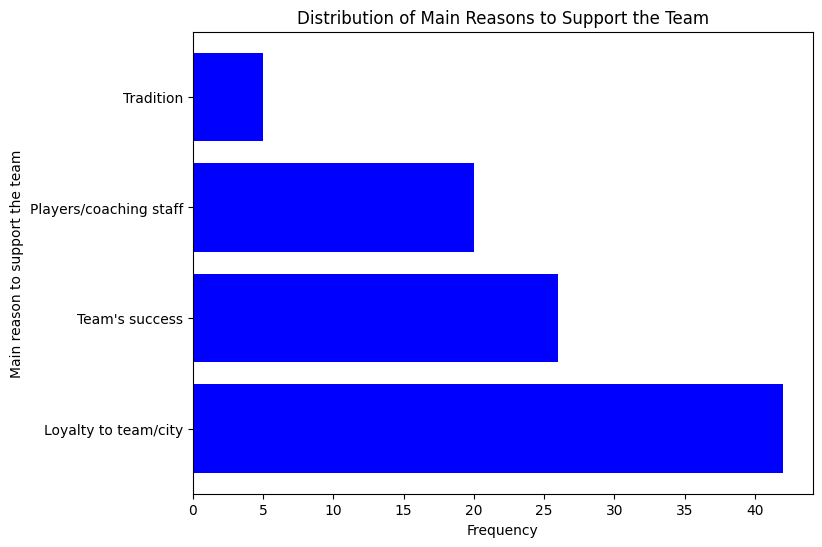

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(new_sup_frq.index, new_sup_frq["count"], color="blue")
ax.set_xlabel("Frequency")
ax.set_ylabel("Main reason to support the team")
ax.set_title("Distribution of Main Reasons to Support the Team")
plt.show()

In [21]:
watching_freq_dist = pd.DataFrame(
    data["Frequency of watching the team's games"].value_counts()
)
watching_freq_dist

,count
Frequency of watching the team's games,
Most games,36
Every game,25
Some games,25
Rarely,11
Never,3


In [22]:
live_freq_dist = pd.DataFrame(data["attended live games"].value_counts())
live_freq_dist

,count
attended live games,
No,73
Yes,27


In [23]:
method_follow_freq_dist = pd.DataFrame(
    data["Preferred method of following the team"].value_counts()
)
method_follow_freq_dist

,count
Preferred method of following the team,
TV,72
Online streaming,26
Live,1
Videos,1


In [24]:
news_freq_dist = pd.DataFrame(data["Methods to get news about the team"].value_counts())
news_freq_dist

,count
Methods to get news about the team,
Social media;,49
Team website;,12
Social media;Team website;,11
Social media;News outlets;,8
Team website;Social media;News outlets;,6
Team website;Social media;,5
News outlets;,2
News outlets;Social media;,1
Social media;from my dad;,1


In [25]:
method_counts = {}
for methods in data["Methods to get news about the team"]:
    methods_list = methods.split(";")
    for method in methods_list:
        if method in method_counts:
            method_counts[method] += 1
        else:
            method_counts[method] = 1

news_freq_dist = pd.DataFrame.from_dict(
    method_counts, orient="index", columns=["Frequency"]
)
news_freq_dist = news_freq_dist.sort_values(by="Frequency", ascending=False)
news_freq_dist

,Frequency
,100
Social media,85
Team website,37
News outlets,21
from my dad,1
friends,1
Friends,1


In [26]:
importance_win_freq_dist = pd.DataFrame(data["Importance of winning"].value_counts())
importance_win_freq_dist

,count
Importance of winning,
Very important,60
Somewhat important,35
Not important at all,5


In [27]:
current_performance_freq_dist = pd.DataFrame(
    data["Feeling about the team's current performance"].value_counts()
)
current_performance_freq_dist

,count
Feeling about the team's current performance,
Very satisfied,36
Somewhat satisfied,34
Neutral,18
Somewhat dissatisfied,6
Very dissatisfied,6


In [28]:
belonging_freq_dist = pd.DataFrame(data["Feels a sense of belonging"].value_counts())
belonging_freq_dist

,count
Feels a sense of belonging,
Agree,52
Strongly agree,22
Neutral,15
Disagree,8
Strongly disagree,3


In [29]:
merchandise_freq_dist = pd.DataFrame(data["Purchased merchandise "].value_counts())
merchandise_freq_dist

,count
Purchased merchandise,
Yes,53
No,47


In [30]:
recommend_freq_dist = pd.DataFrame(data["Recommends the team others"].value_counts())
recommend_freq_dist

,count
Recommends the team others,
Very likely,54
Somewhat likely,25
Neutral,16
Very unlikely,3
Somewhat unlikely,2


In [31]:
attended_game_freq_dist = pd.DataFrame(
    data["attended a game or event hosted by fav team"].value_counts()
)
attended_game_freq_dist

,count
attended a game or event hosted by fav team,
No,76
Yes,24


In [32]:
follow_other_freq_dist = pd.DataFrame(data["Follows other teams"].value_counts())
follow_other_freq_dist

,count
Follows other teams,
Yes,55
No,45


In [33]:
team_switch_freq_dist = pd.DataFrame(data["Previously switched teams"].value_counts())
team_switch_freq_dist

,count
Previously switched teams,
No,91
Yes,9


In [34]:
other_team_freq_dist = pd.DataFrame(data["If Yes which team ?"].value_counts())
other_team_freq_dist

,count
If Yes which team ?,
Real Madrid,6
Barcelona,5
Liverpool,3
Real Madrid,2
Liverpool,2
Manchester city,2
دورى الانجليزى بذات السيتى,1
El_ Ahly,1
I also support Alahly,1


In [35]:
# Create a dictionary to map team names to standard names
other_team_map = {
    "Real Madrid": "Real Madrid",
    "Barcelona": "Barcelona",
    "Liverpool": "Liverpool",
    "Manchester city": "Manchester City",
    "دورى الانجليزى بذات السيتى": "Manchester City",
    "El_ Ahly": "Al Ahly",
    "I also support Alahly": "Al Ahly",
    "Al ahly and Manchester united": ["Al Ahly", "Manchester United"],
    "Rrr": "Unknowing",
    "pramvadora": "Unknowing",
    "Arsenal": "Arsenal",
    "ريال مدريد": "Real Madrid",
    "Barchlona": "Barcelona",
    "Liver pool": "Liverpool",
    "Al Ahly": "Al Ahly",
    "Madrid": "Real Madrid",
    "PSG": "Paris Saint-Germain",
    "liver bool": "Liverpool",
    "Fc Barcelona": "Barcelona",
    "Man City": "Manchester City",
    "Global teams in general": "Unknowing",
    "EL ahly": "Al Ahly",
    "Football teams like Liverpool & Al-Ahly": [
        "Liverpool",
        "Al Ahly",
    ],
    "Real Madrid, Man City, Elnasr، PSG, Bayern Munich and sometimes Barcelona": [
        "Real Madrid",
        "Manchester City",
        "Al Nasser",
        "Paris Saint-Germain",
        "Bayern Munich",
        "Barcelona",
    ],
    "Bayern": "Bayern Munich",
    "FC Barcelona": "Barcelona",
    "El zamalek": "El Zamalek",
    "Real Madrid ,liverpool": ["Real Madrid", "Liverpool"],
    "Elithad elsakandary": "Al Ittihad Alexandria Club",
    "All Arabic teams in the league": "Unknowing",
    "Manchester City FC": "Manchester City",
    "Bayrn Munich": "Bayern Munich",
    "Man city": "Manchester City",
}

mapped_teams = data["If Yes which team ?"].apply(lambda x: other_team_map.get(x))
mapped_teams = mapped_teams.explode()
freq_dist = pd.DataFrame(mapped_teams.value_counts())
freq_dist

,count
If Yes which team ?,
Barcelona,8
Liverpool,7
Real Madrid,5
Manchester City,4
Al Ahly,4
Unknowing,3
Bayern Munich,2
Paris Saint-Germain,2
Al Ittihad Alexandria Club,1


In [36]:
losing_feeling_freq_dist = pd.DataFrame(data["Feeling when losing"].value_counts())
losing_feeling_freq_dist

,count
Feeling when losing,
Somewhat disappointed,42
Very disappointed,40
Neutral,17
Very happy,1


In [37]:
motivation_freq_dist = pd.DataFrame(
    data["Motivation to support the team"].value_counts()
)
motivation_freq_dist

,count
Motivation to support the team,
Loyalty to team/city,54
Players/coaching staff,34
Tradition,9
they don't support gays.,1
معاه فى حلو والمر مش محتاج اكتر من كده,1
no reason,1


In [38]:
perception_freq_dist = pd.DataFrame(
    data["perception change to the game over the years"].value_counts()
)
perception_freq_dist

,count
perception change to the game over the years,
Improved,46
Stayed the same,44
Declined,6
Not applicable,4


In [39]:
fair_coverage_freq_dist = pd.DataFrame(
    data[
        "Certainty that the team receives fair coverage from the media "
    ].value_counts()
)
fair_coverage_freq_dist

,count
Certainty that the team receives fair coverage from the media,
Yes,68
Unsure,19
No,13


# Are there significant differences in the frequency of watching the team's games based on gender?


In [62]:
table = pd.crosstab(data["Gender"], data["Frequency of watching the team's games"])
print(table)
stat, p, dof, expected = chi2_contingency(table)
print(f"Chi-squared statistic: {stat}")
print(f"P-value: {p}")
if p < 0.05:
    print(
        "There is a significant difference in the frequency of watching the team's games based on gender."
    )
else:
    print(
        "There is no significant difference in the frequency of watching the team's games based on gender."
    )

Frequency of watching the team's games  Every game  Most games  Never  Rarely   
Gender                                                                          
Female                                           3          11      0       7  \
Male                                            22          25      3       4   

Frequency of watching the team's games  Some games  
Gender                                              
Female                                          10  
Male                                            15  
Chi-squared statistic: 11.994654350895583
P-value: 0.01739106115675269
There is a significant difference in the frequency of watching the team's games based on gender.


# Is there a significant relationship between the age group and the preferred method of following the team?


In [41]:
age_method_ct = pd.crosstab(
    data["Age group"], data["Preferred method of following the team"]
)

chi2, p_value, dof, expected = chi2_contingency(age_method_ct)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print(
        "There is a significant relationship between age group and preferred method of following the team."
    )
else:
    print(
        "There is no significant relationship between age group and preferred method of following the team."
    )

Chi-squared statistic: 2.0453466286799618
P-value: 0.999333088497827
There is no significant relationship between age group and preferred method of following the team.


# Is there a significant relationship between the highest level of education completed and the importance of winning for fans?


In [42]:
# Create a contingency table
edu_importance_ct = pd.crosstab(
    data["Highest level of education completed"], data["Importance of winning"]
)

# Conduct chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(edu_importance_ct)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print(
        "There is a significant relationship between highest level of education completed and the importance of winning for fans."
    )
else:
    print(
        "There is no significant relationship between highest level of education completed and the importance of winning for fans."
    )

Chi-squared statistic: 5.002560163850486
P-value: 0.5434847969317251
There is no significant relationship between highest level of education completed and the importance of winning for fans.


# Is there a significant relationship between the importance of winning and the fan's motivation to support the team?


In [43]:
# create a contingency table
contingency_table = pd.crosstab(
    data["Importance of winning"], data["Motivation to support the team"]
)

# perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print(
        "There is a significant relationship between the importance of winning and the fan's motivation to support the team."
    )
else:
    print(
        "There is no significant relationship between the importance of winning and the fan's motivation to support the team."
    )

Chi-square statistic: 28.83260711692084
P-value: 0.0013261969099455143
There is a significant relationship between the importance of winning and the fan's motivation to support the team.


# Are there significant differences in the feeling of belonging based on whether or not the fan has purchased merchandise?


In [44]:
# create a contingency table
contingency_table = pd.crosstab(
    data["Feels a sense of belonging"], data["Purchased merchandise "]
)

# perform chi-square test
chi2, pval, dof, expected = chi2_contingency(contingency_table)

# print results
print("Chi-square test statistic:", chi2)
print("P-value:", pval)

if p_value < 0.05:
    print(
        "There is a significant relationship between feeling of belonging and purchased merchandise."
    )
else:
    print(
        "There is no significant relationship between feeling of belonging and purchased merchandise."
    )

Chi-square test statistic: 9.8470110112021
P-value: 0.04308514151516705
There is a significant relationship between feeling of belonging and purchased merchandise.


# What is the correlation between the age group and the frequency of watching the team's games?


In [45]:
# Convert Age group to numeric values
age_dict = {"18-24": 1, "25-34": 2, "35-44": 3, "45-54": 4, "55-64": 5, "65 or over": 6}
data["Age group (Num)"] = data["Age group"].map(age_dict)

# Convert Frequency of watching the team's games to numeric values
freq_dict = {"Every game": 3, "Most games": 2, "Some games": 1, "Rarely": 0}
data["Frequency of watching the team's games (Num)"] = data[
    "Frequency of watching the team's games"
].map(freq_dict)

# Calculate correlation coefficient
correlation = data["Age group (Num)"].corr(
    data["Frequency of watching the team's games (Num)"]
)

# Print correlation coefficient
print(
    f"The correlation between the age group and the frequency of watching the team's games is: {correlation}"
)

The correlation between the age group and the frequency of watching the team's games is: 0.027584487900496057


# Is there a correlation between the importance of winning and the motivation to support the team?


In [46]:
win_dict = {"Very important ": 3, "Somewhat important": 2, "Not important at all": 1}
data["Importance of winning (Num)"] = data["Importance of winning"].map(win_dict)


sup_dict = {"Loyalty to team/city": 3, "Players/coaching staff": 2, "Tradition": 1}
data["Motivation to support the team (Num)"] = data[
    "Motivation to support the team"
].map(sup_dict)


correlation = data["Importance of winning (Num)"].corr(
    data["Motivation to support the team (Num)"]
)

print(
    f"The correlation between the importance of winning and the motivation to support the team: {correlation}"
)

The correlation between the importance of winning and the motivation to support the team: 0.27024026858159944


# Is there a correlation between the feeling when losing and the follows of other teams?


In [47]:
loss_dict = {
    "Very disappointed": 1,
    "Somewhat disappointed": 2,
    "Neutral": 3,
    "Somewhat satisfied": 4,
    "Very satisfied": 5,
}
data["Feeling when losing (Num)"] = data["Feeling when losing"].map(loss_dict)

follow_dict = {"Yes": 1, "No": 0}
data["Follows other teams (Num)"] = data["Follows other teams"].map(follow_dict)
correlation = data["Feeling when losing (Num)"].corr(data["Follows other teams (Num)"])
print(
    f"The correlation between the feeling when losing and the follows of other teams: {correlation}"
)

The correlation between the feeling when losing and the follows of other teams: -0.17510262927282322


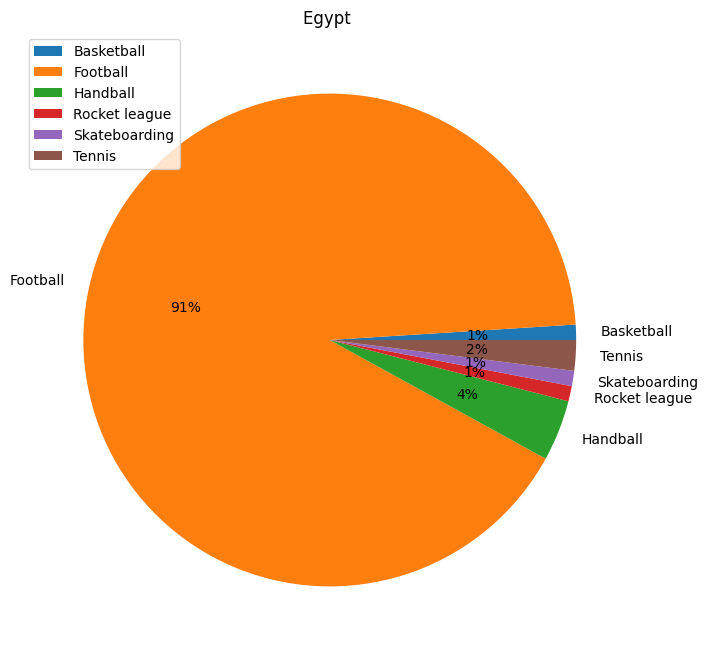

In [48]:
grouped = data.groupby(["Country", "favourite sport"]).size().reset_index(name="count")
pivot = grouped.pivot(index="Country", columns="favourite sport", values="count")
for country in pivot.index:
    sports = pivot.loc[country]
    fig, ax = plt.subplots(figsize=(18, 8))
    sports.plot(kind="pie", autopct="%1.f%%", ax=ax)
    ax.set_title(country)
    ax.set_ylabel("")
    ax.legend()
    plt.show()

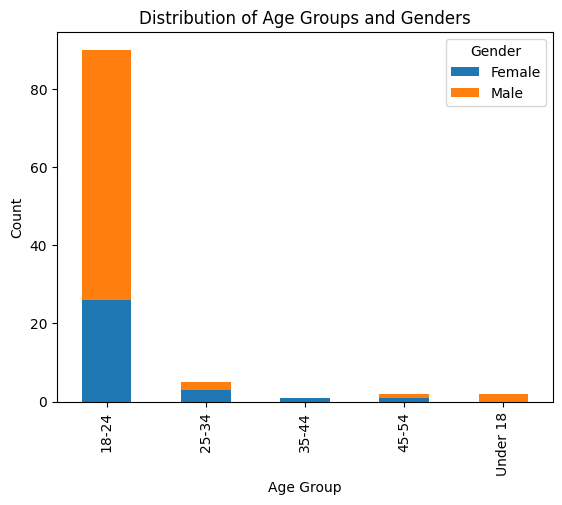

In [49]:
age_gender_counts = (
    data.groupby(["Age group", "Gender"]).size().reset_index(name="count")
)
age_gender_pivot = age_gender_counts.pivot(
    index="Age group", columns="Gender", values="count"
)
age_gender_pivot.plot(kind="bar", stacked=True)
plt.title("Distribution of Age Groups and Genders")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

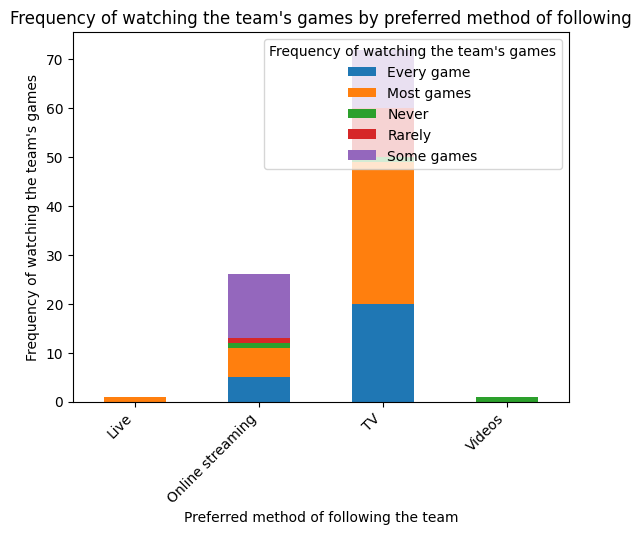

In [50]:
grouped = (
    data.groupby(
        [
            "Preferred method of following the team",
            "Frequency of watching the team's games",
        ]
    )
    .size()
    .unstack()
)
grouped.plot(kind="bar", stacked=True)
plt.title("Frequency of watching the team's games by preferred method of following")
plt.xlabel("Preferred method of following the team")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency of watching the team's games")

plt.show()

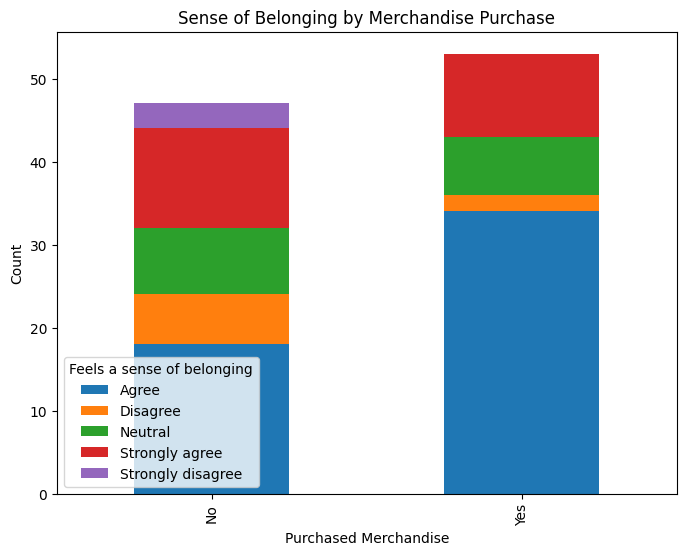

In [51]:
belonging_merchandise = data[
    ["Feels a sense of belonging", "Purchased merchandise "]
].dropna()
counts = (
    belonging_merchandise.groupby(
        ["Purchased merchandise ", "Feels a sense of belonging"]
    )
    .size()
    .unstack()
)
ax = counts.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_xlabel("Purchased Merchandise")
ax.set_ylabel("Count")
ax.set_title("Sense of Belonging by Merchandise Purchase")
plt.show()

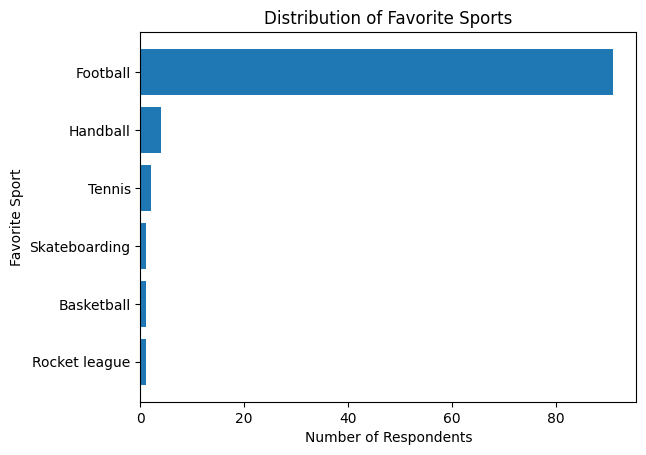

In [52]:
sport_counts = data["favourite sport"].value_counts()
sport_counts_sorted = sport_counts.sort_values(ascending=True)

plt.barh(sport_counts_sorted.index, sport_counts_sorted.values)
plt.xlabel("Number of Respondents")
plt.ylabel("Favorite Sport")
plt.title("Distribution of Favorite Sports")
plt.show()

In [54]:
data["favourite sport"].value_counts()

favourite sport
Football         91
Handball          4
Tennis            2
Rocket league     1
Basketball        1
Skateboarding     1
Name: count, dtype: int64

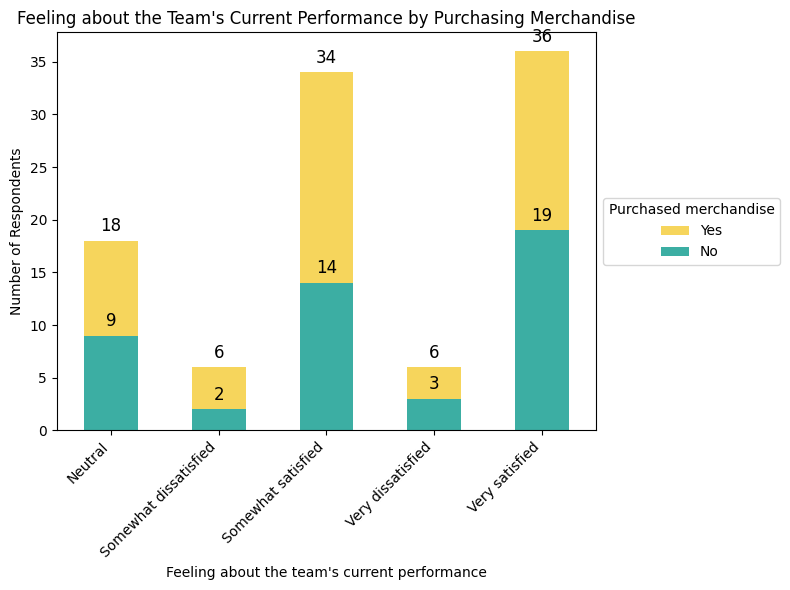

In [55]:
pivot_table = pd.pivot_table(
    data,
    values="ID",
    index=["Feeling about the team's current performance"],
    columns=["Purchased merchandise "],
    aggfunc="count",
    fill_value=0,
)
colors = ["#3CAEA3", "#F6D55C", "#ED553B"]
ax = pivot_table.plot(kind="bar", stacked=True, color=colors, figsize=(8, 6))
ax.set_xlabel("Feeling about the team's current performance")
plt.xticks(rotation=45, ha="right")
ax.set_ylabel("Number of Respondents")
ax.set_title("Feeling about the Team's Current Performance by Purchasing Merchandise")
for i in ax.containers:
    ax.bar_label(i, label_type="edge", fontsize=12, padding=4)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],
    labels[::-1],
    title="Purchased merchandise",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()
plt.show()

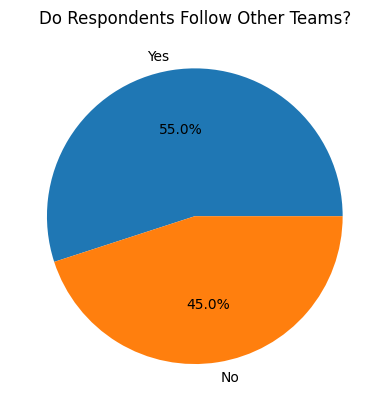

In [56]:
follows_other_teams = data["Follows other teams"].value_counts()
plt.pie(follows_other_teams, labels=follows_other_teams.index, autopct="%1.1f%%")
plt.title("Do Respondents Follow Other Teams?")
plt.show()

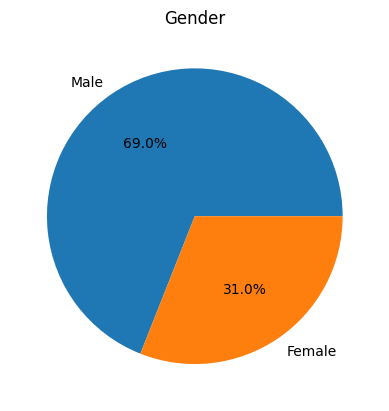

In [57]:
Gender = data["Gender"].value_counts()
plt.pie(Gender, labels=Gender.index, autopct="%1.1f%%")
plt.title("Gender")
plt.show()

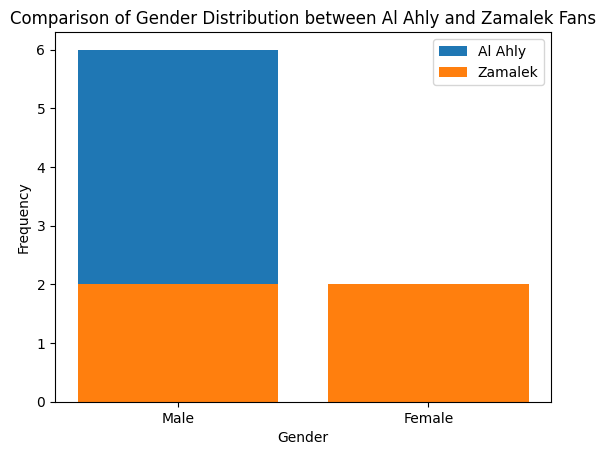

In [58]:
# Filter the data by the two teams
al_ahly_data = data[data["favourite team"] == "Al Ahly"]
zamalek_data = data[data["favourite team"] == "Zamalek"]

al_ahly_gender_freq = al_ahly_data["Gender"].value_counts()
zamalek_gender_freq = zamalek_data["Gender"].value_counts()
fig, ax = plt.subplots()
ax.bar(al_ahly_gender_freq.index, al_ahly_gender_freq.values, label="Al Ahly")
ax.bar(zamalek_gender_freq.index, zamalek_gender_freq.values, label="Zamalek")
ax.set_xlabel("Gender")
ax.set_ylabel("Frequency")
ax.set_title("Comparison of Gender Distribution between Al Ahly and Zamalek Fans")
ax.legend()
plt.show()

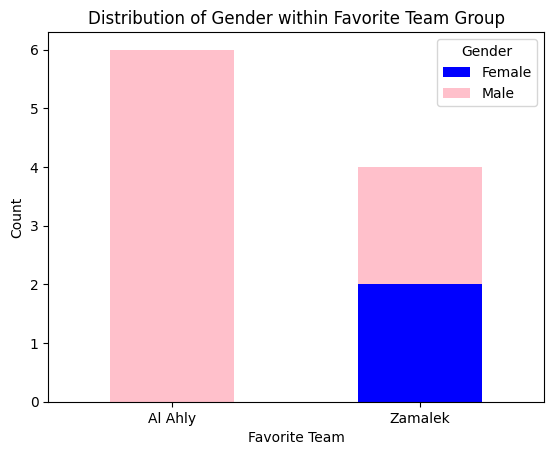

In [59]:
# group data by favorite team and gender
favteam_gender = (
    data[data["favourite team"].isin(["Al Ahly", "Zamalek"])]
    .groupby(["favourite team", "Gender"])
    .size()
    .unstack()
)

# plot stacked bar chart
ax = favteam_gender.plot(kind="bar", stacked=True, color=["blue", "pink"])

# set plot properties
plt.xticks(rotation=0)
plt.xlabel("Favorite Team")
plt.ylabel("Count")
plt.title("Distribution of Gender within Favorite Team Group")
plt.legend(title="Gender", loc="upper right", labels=["Female", "Male"])
plt.show()

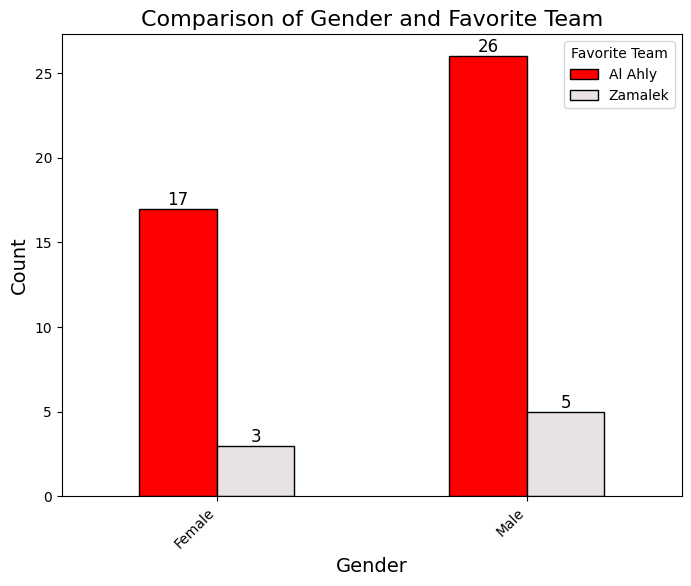

In [ ]:
subset = data[["Gender", "favourite team"]]
subset = subset[
    (subset["favourite team"] == "Al Ahly") | (subset["favourite team"] == "Zamalek")
]
grouped = subset.groupby(["Gender", "favourite team"]).size().reset_index(name="count")
pivot = grouped.pivot(index="Gender", columns="favourite team", values="count")
ax = pivot.plot(kind="bar", figsize=(8, 6), color=["red", "#E8E2E2"], edgecolor="black")
for i, bars in enumerate(ax.containers):
    ax.bar_label(bars, label_type="edge", fontsize=12)
plt.legend(title="Favorite Team", loc="upper right")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Comparison of Gender and Favorite Team", fontsize=16)
plt.show()